In [31]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
import cv2
import sklearn 
import tensorflow as tf
from tensorflow import keras
from PIL import Image as im
from glob import glob
from sklearn.model_selection import train_test_split
import keras
#from tf.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
     

In [32]:
pwd

'/home/data'

In [33]:
train_path = '/home/data/TRAIN'

(6516, 224, 224, 3) (6516,)


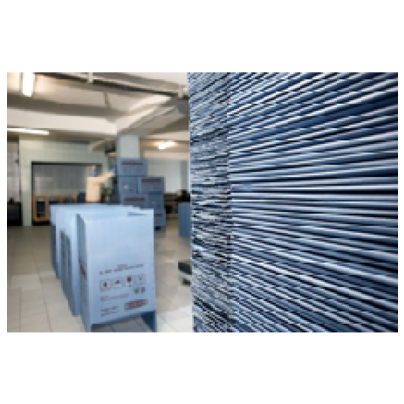

In [34]:
dict = {
    'Cardboard': 0,
    'Food_Waste': 1, 
    'Glass': 2,
    'Metal': 3, 
    'Other': 4,
    'Paper': 5,
    'Plastic': 6
}

train_data = []
train_labels = []
for i in os.listdir(train_path):
  dir = train_path + '/' + i
  for j in os.listdir(dir):
    img_path = dir + '/' + j
    img = cv2.imread(img_path,-1)
    img = cv2.resize(img,(224,224),interpolation = cv2.INTER_NEAREST)
    train_data.append(img)
    train_labels.append(dict[i]) # Hey Deepak, edit this

plt.figure(figsize=(7,10))
plt.axis('off')
plt.imshow(img)
train_data = np.array(train_data)
train_labels = np.array(train_labels)
print(train_data.shape, train_labels.shape)
     

In [35]:
# Show the data classes
classes = os.listdir(train_path)
classes

['.ipynb_checkpoints',
 'Food_Waste',
 'Glass',
 'Metal',
 'Other',
 'Paper',
 'Plastic',
 'Cardboard']

In [36]:
test_path = '/home/data/TEST'

In [37]:

#Loading train datasets
test_data = []
test_labels = []
classes = 7 #data belonges to 7 class
for i in os.listdir(test_path):
    dir = test_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir + '/' + j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img,(224,224),interpolation = cv2.INTER_NEAREST)
        test_data.append(img)
        test_labels.append(dict[i])


test_data = np.array(test_data)
test_labels = np.array(test_labels)
print(test_data.shape, test_labels.shape)

(4906, 224, 224, 3) (4906,)


In [38]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_path, # this is the target directory means give train directory path
                                      target_size=(224, 224), # all images will be resized to 224x224
                                      batch_size=32,
                                      class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels
     

Found 6516 images belonging to 8 classes.


In [39]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

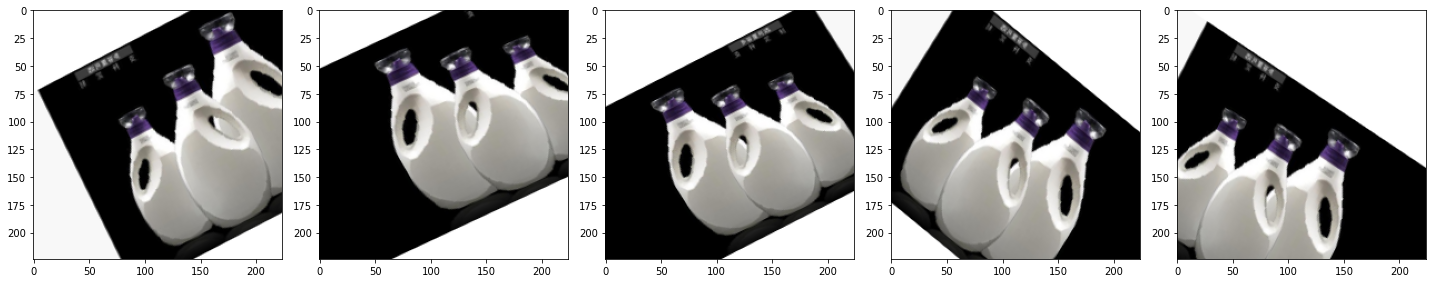

In [40]:

# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

Text(0, 0.5, 'Number of Training images')

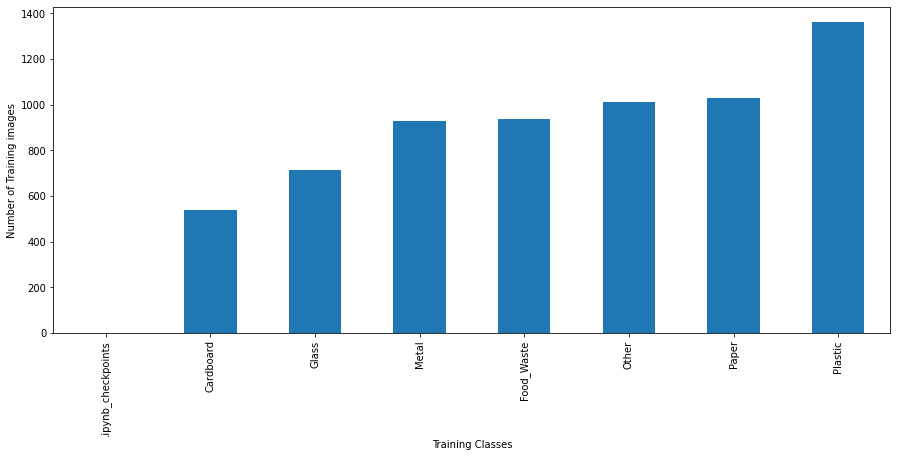

In [85]:
# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(train_path):
    data_dic[folder] = len(os.listdir(train_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Training Classes')
plt.ylabel('Number of Training images')

In [42]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
testing_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
testing_data = testing_datagen.flow_from_directory(test_path, # this is the target directory means give train directory path
                                      target_size=(224, 224), # all images will be resized to 224x224
                                      batch_size=32,
                                      class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels
     

Found 4906 images belonging to 8 classes.


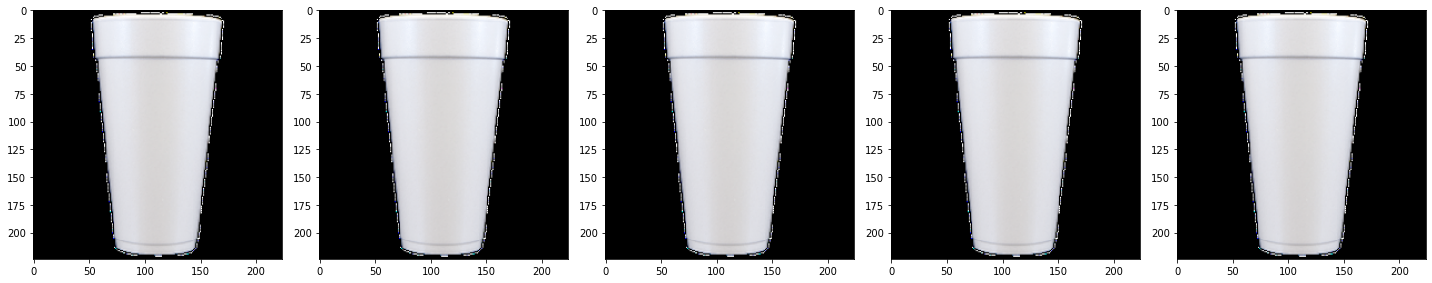

In [43]:

# showing augmented images
images = [testing_data[1][0][0] for i in range(5)]
plotImages(images)

Text(0, 0.5, 'Number of Valedation images')

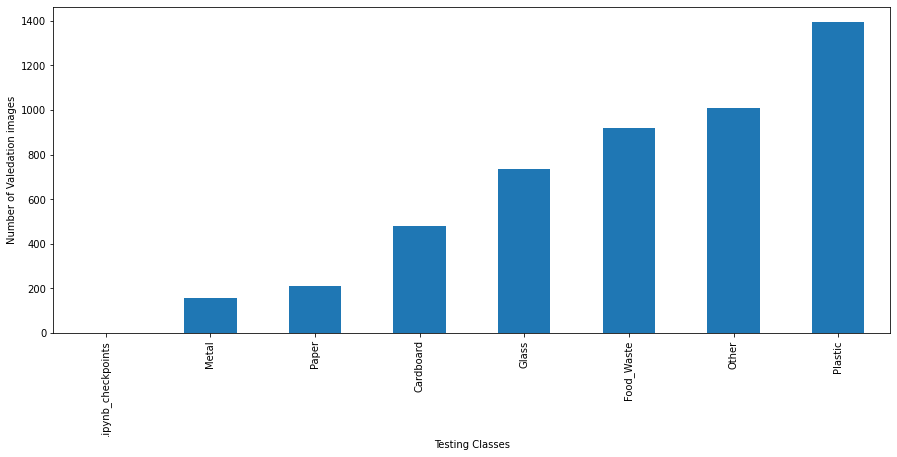

In [44]:
# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(test_path):
    data_dic[folder] = len(os.listdir(test_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Testing Classes')
plt.ylabel('Number of Valedation images')

In [45]:

IMAGE_SIZE = [224, 224]
     

In [46]:

'''
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
'''

from keras.utils import np_utils


In [47]:

train_labels.shape

(6516,)

In [48]:
X_train = train_data
y_train = train_labels
X_test = test_data
y_test = test_labels 


Y_train = (np_utils.to_categorical(y_train))
Y_test = (np_utils.to_categorical(y_test))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(6516, 224, 224, 3)
(6516, 7)
(4906, 224, 224, 3)
(4906, 7)


In [49]:

# We build the base model
base_model = VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet', include_top=False)
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [50]:

# We freeze every layer in our base model so that they do not train, we want that our feature extractor stays as before --> transfer learning
for layer in base_model.layers: 
  layer.trainable = False
  print('Layer ' + layer.name + ' frozen.')


# We take the last layer of our the model and add it to our classifier
last = base_model.layers[-1].output
x = Flatten()(last)
#x = Dense(1000, activation='relu', name='fc1')(x)
#x = Dropout(0.3)(x)
prediction = Dense(len(os.listdir(train_path)), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=prediction)

Layer input_2 frozen.
Layer block1_conv1 frozen.
Layer block1_conv2 frozen.
Layer block1_pool frozen.
Layer block2_conv1 frozen.
Layer block2_conv2 frozen.
Layer block2_pool frozen.
Layer block3_conv1 frozen.
Layer block3_conv2 frozen.
Layer block3_conv3 frozen.
Layer block3_pool frozen.
Layer block4_conv1 frozen.
Layer block4_conv2 frozen.
Layer block4_conv3 frozen.
Layer block4_pool frozen.
Layer block5_conv1 frozen.
Layer block5_conv2 frozen.
Layer block5_conv3 frozen.
Layer block5_pool frozen.


In [51]:
# We compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [52]:

model.summary() # Tranfer Learning Summary

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [53]:

# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath = 'vgg16_model.weights.best.hdf5', 
                               verbose = False, 
                               save_best_only = True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 4,
                           restore_best_weights = True,
                           mode = 'min')
     

In [54]:
result_VGG_TF = model.fit(training_data,steps_per_epoch=len(training_data),epochs=15,callbacks=[early_stop, checkpointer],validation_data=testing_data,validation_steps=len(testing_data))

'''
# We start the training
epochs = 100
batch_size = 256
# We train it
result_VGG_TF = model.fit(X_train, Y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_test, Y_test),
                                    epochs = 100)
                                    '''

Epoch 1/15
204/204 [==============================] - 86s 417ms/step - loss: 1.5096 - accuracy: 0.5006 - val_loss: 0.8807 - val_accuracy: 0.6920
Epoch 2/15
204/204 [==============================] - 85s 417ms/step - loss: 1.1265 - accuracy: 0.6143 - val_loss: 1.0038 - val_accuracy: 0.6586
Epoch 3/15
204/204 [==============================] - 86s 421ms/step - loss: 1.0737 - accuracy: 0.6498 - val_loss: 0.9344 - val_accuracy: 0.6877
Epoch 4/15
204/204 [==============================] - 86s 423ms/step - loss: 1.0315 - accuracy: 0.6498 - val_loss: 0.7299 - val_accuracy: 0.7542
Epoch 5/15
204/204 [==============================] - 84s 409ms/step - loss: 1.0086 - accuracy: 0.6595 - val_loss: 0.7152 - val_accuracy: 0.7642
Epoch 6/15
204/204 [==============================] - 85s 416ms/step - loss: 0.9791 - accuracy: 0.6799 - val_loss: 0.6714 - val_accuracy: 0.7742
Epoch 7/15
204/204 [==============================] - 85s 419ms/step - loss: 0.9708 - accuracy: 0.6791 - val_loss: 0.6529 - val_ac

'\n# We start the training\nepochs = 100\nbatch_size = 256\n# We train it\nresult_VGG_TF = model.fit(X_train, Y_train,\n                                    batch_size=batch_size,\n                                    validation_data=(X_test, Y_test),\n                                    epochs = 100)\n                                    '

In [61]:

probs = model.predict(testing_data,steps = len(testing_data), verbose = 1)


154/154 [==============================] - 16s 100ms/step


In [62]:

preds = np.argmax(probs,axis = 1)

In [63]:

from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       480
           1       0.20      0.09      0.12       918
           2       0.15      0.21      0.17       735
           3       0.03      0.12      0.05       159
           4       0.23      0.02      0.04      1010
           5       0.05      0.18      0.08       211
           6       0.27      0.07      0.11      1393
           7       0.00      0.00      0.00         0

    accuracy                           0.08      4906
   macro avg       0.12      0.09      0.07      4906
weighted avg       0.19      0.08      0.09      4906

[[  0  37  82  68   5  86  31 171]
 [  0  82 169 127  16 162  75 287]
 [  0  73 151  87  13 113  52 246]
 [  0  12  36  19   2  22   9  59]
 [  0  86 231 117  22 144  75 335]
 [  0  17  47  20   9  38  15  65]
 [  0 106 305 166  27 231  97 461]
 [  0   0   0   0   0   0   0   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [64]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,preds)


cm

array([[  0,  37,  82,  68,   5,  86,  31, 171],
       [  0,  82, 169, 127,  16, 162,  75, 287],
       [  0,  73, 151,  87,  13, 113,  52, 246],
       [  0,  12,  36,  19,   2,  22,   9,  59],
       [  0,  86, 231, 117,  22, 144,  75, 335],
       [  0,  17,  47,  20,   9,  38,  15,  65],
       [  0, 106, 305, 166,  27, 231,  97, 461],
       [  0,   0,   0,   0,   0,   0,   0,   0]])

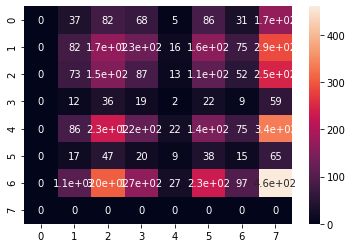

In [65]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')

In [66]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,preds)
score

0.08336730534039952

In [67]:

# We evaluate the accuracy and the loss in the test set
scores = model.evaluate(testing_data, steps = len(testing_data), verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

154/154 [==============================] - 15s 94ms/step - loss: 0.5678 - accuracy: 0.8027
Test loss: 0.5677569508552551
Test accuracy: 0.8026905655860901


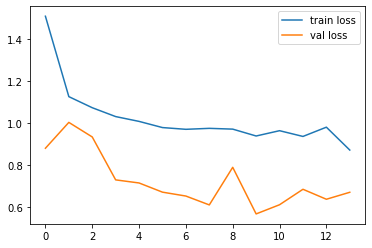

<Figure size 432x288 with 0 Axes>

In [68]:

# loss
plt.plot(result_VGG_TF.history['loss'], label='train loss')
plt.plot(result_VGG_TF.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

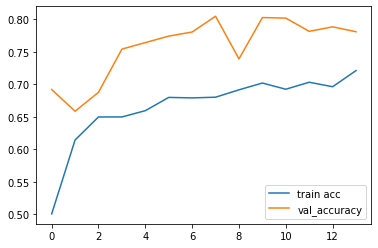

<Figure size 432x288 with 0 Axes>

In [69]:

# accuracies
plt.plot(result_VGG_TF.history['accuracy'], label='train acc')
plt.plot(result_VGG_TF.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
     

In [70]:

y_pred = model.predict(testing_data)

In [71]:
y_pred

array([[4.86901167e-16, 2.91544322e-13, 1.23158539e-10, ...,
        1.75716020e-09, 4.57631577e-09, 6.78353786e-01],
       [6.47039497e-13, 5.82833707e-07, 1.01951984e-04, ...,
        9.15802479e-01, 2.40007639e-02, 4.35143560e-02],
       [5.45025288e-13, 2.21484406e-05, 3.77878845e-02, ...,
        9.93126631e-03, 1.92486811e-02, 9.29362774e-01],
       ...,
       [4.20997669e-14, 8.24449330e-07, 8.40252578e-01, ...,
        1.34354919e-01, 3.06718226e-04, 2.50162333e-02],
       [1.33214282e-11, 1.24790427e-08, 2.89132625e-01, ...,
        1.49569626e-03, 4.77510355e-02, 5.96139312e-01],
       [1.31948402e-11, 1.33489072e-02, 6.53882921e-02, ...,
        6.91299140e-01, 8.05442780e-03, 2.12081760e-01]], dtype=float32)

In [74]:
prediction = np.argmax(y_pred,axis =1)

In [75]:
prediction

array([7, 5, 7, ..., 2, 7, 5])

In [81]:

rev_dict = {
    0 : 'Cardboard',
    1 :'Food_Waste', 
    2 : 'Glass',
    3 : 'Metal', 
    4 : 'Other',
    5 :'Paper',
    6 : 'Plastic',
    7 : 'ipynb'
}

In [82]:

rev_dict.values()

dict_values(['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic', 'ipynb'])

In [83]:
y_hat_pred = []
for i in prediction:
  y_hat_pred.append(rev_dict[i])

In [84]:
y_hat_pred

['ipynb',
 'Paper',
 'ipynb',
 'Paper',
 'ipynb',
 'Glass',
 'Glass',
 'ipynb',
 'Paper',
 'Metal',
 'Glass',
 'Other',
 'ipynb',
 'ipynb',
 'Plastic',
 'ipynb',
 'ipynb',
 'ipynb',
 'Plastic',
 'Metal',
 'Plastic',
 'ipynb',
 'Metal',
 'ipynb',
 'Paper',
 'Paper',
 'Plastic',
 'Other',
 'Metal',
 'ipynb',
 'Metal',
 'Paper',
 'Paper',
 'ipynb',
 'ipynb',
 'Glass',
 'ipynb',
 'Metal',
 'Paper',
 'ipynb',
 'Paper',
 'Metal',
 'Glass',
 'ipynb',
 'ipynb',
 'ipynb',
 'ipynb',
 'Food_Waste',
 'Paper',
 'Glass',
 'Paper',
 'Plastic',
 'Glass',
 'ipynb',
 'Paper',
 'Glass',
 'ipynb',
 'Paper',
 'Plastic',
 'Paper',
 'Paper',
 'Glass',
 'ipynb',
 'ipynb',
 'ipynb',
 'ipynb',
 'Glass',
 'Glass',
 'Glass',
 'ipynb',
 'Glass',
 'Glass',
 'ipynb',
 'Plastic',
 'Glass',
 'ipynb',
 'Metal',
 'ipynb',
 'Paper',
 'Glass',
 'Paper',
 'Plastic',
 'Paper',
 'ipynb',
 'ipynb',
 'ipynb',
 'ipynb',
 'Glass',
 'ipynb',
 'ipynb',
 'Food_Waste',
 'Paper',
 'Metal',
 'ipynb',
 'Food_Waste',
 'Glass',
 'ipynb',